In [38]:
# Import necessary libraries
import cv2
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path='soya_f.jpg'
img = cv2.imread(image_path)

In [3]:
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [4]:
# display(image_path)

## Image Preprocessing

## 1. Binarization

In [5]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
gray_image = grayscale(img)
cv2.imwrite("gray.jpg", gray_image)

True

In [7]:
# display("gray.jpg")

In [8]:
gr=cv2.imread("gray.jpg")

In [9]:
thres, im_bw=cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("bw.jpg", im_bw);

In [10]:
b=cv2.imread("bw.jpg")

In [11]:
# Perform OCR on the image
extracted_text = pytesseract.image_to_string(img)

In [12]:
# Print the extracted text
print("Extracted Text from Image:")
print(extracted_text)

Extracted Text from Image:
chunks §

100%
" vegetarian

AX




In [13]:
# Perform OCR on the image
extracted_text = pytesseract.image_to_string(gr)

In [14]:
# Print the extracted text
print("Extracted Text from Image:")
print(extracted_text)

Extracted Text from Image:
chunks

100%
vegetarian

low fat




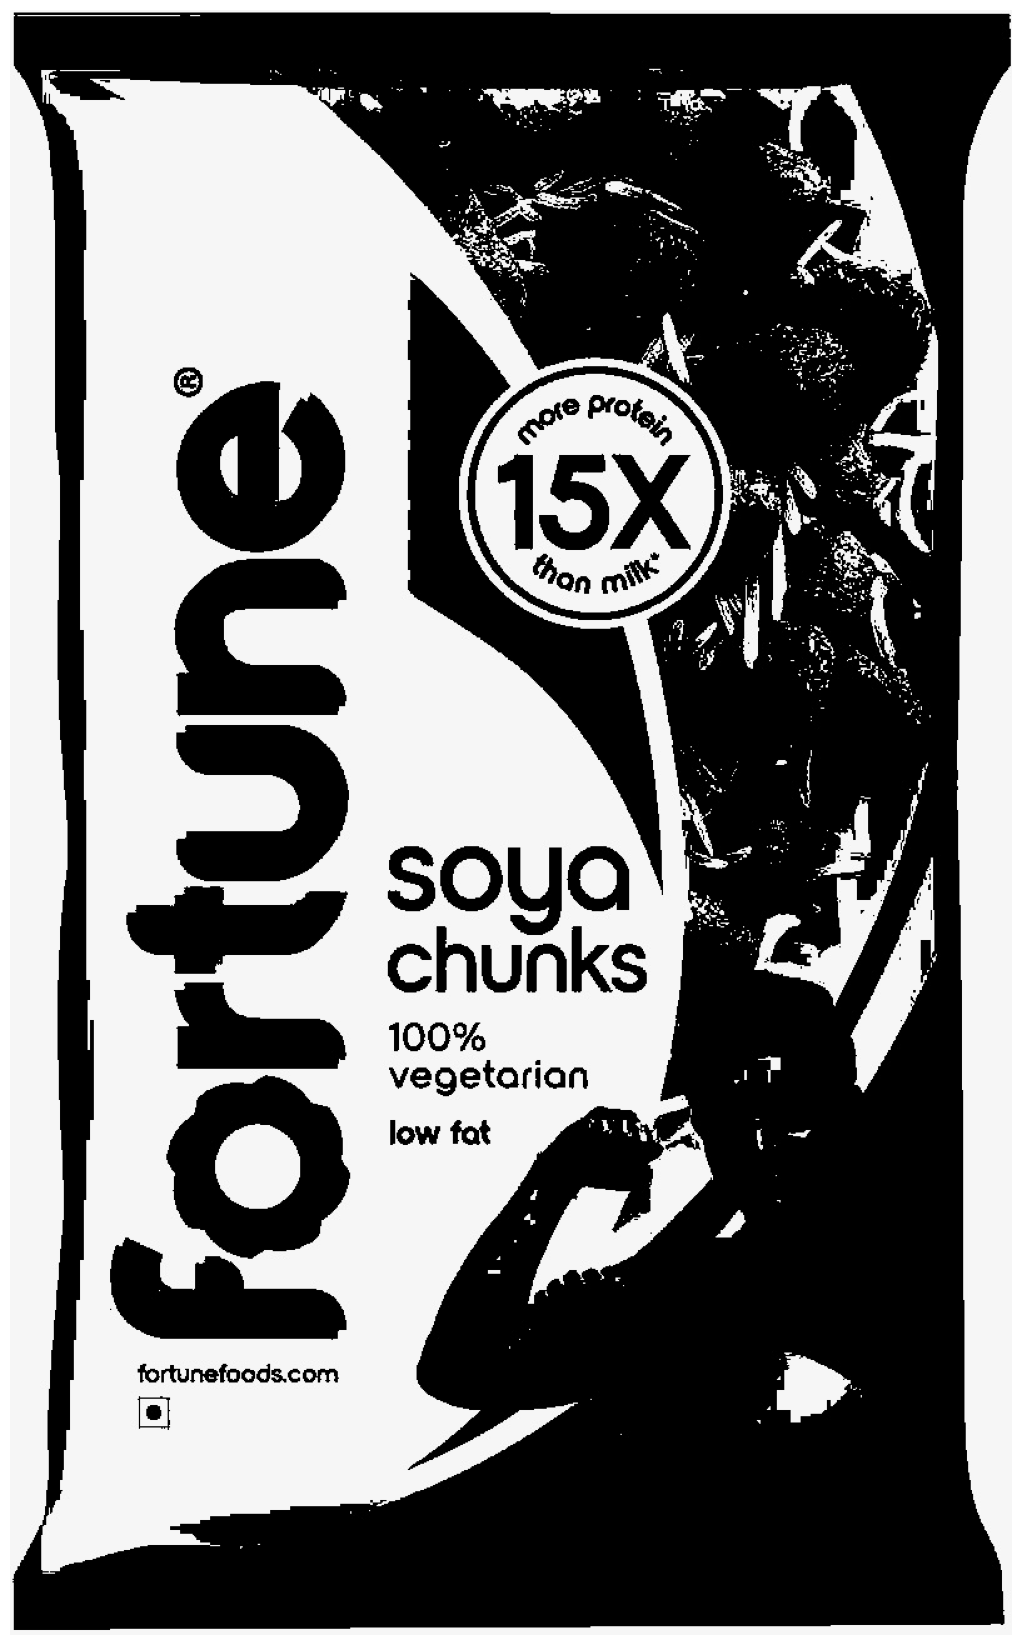

In [24]:
display("bw.jpg")

In [16]:
# inverted_image = cv2.bitwise_not(b)

In [17]:
# cv2.imwrite('inverted.jpg', inverted_image)

In [18]:
# display("inverted.jpg")

In [19]:
# invr=cv2.imread("inverted.jpg")

In [20]:
# # Perform OCR on the image
# extracted_text = pytesseract.image_to_string(b)

In [21]:
# # Print the extracted text
# print("Extracted Text from Image:")
# print(extracted_text)

In [22]:
# # Perform OCR on the image
# extracted_text = pytesseract.image_to_string(invr)

In [23]:
# # Print the extracted text
# print("Extracted Text from Image:")
# print(extracted_text)

## 2. Noise Removal

In [25]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel=np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return image

In [26]:
no_noise=noise_removal(gr)
cv2.imwrite("no_noise.jpg", no_noise)

True

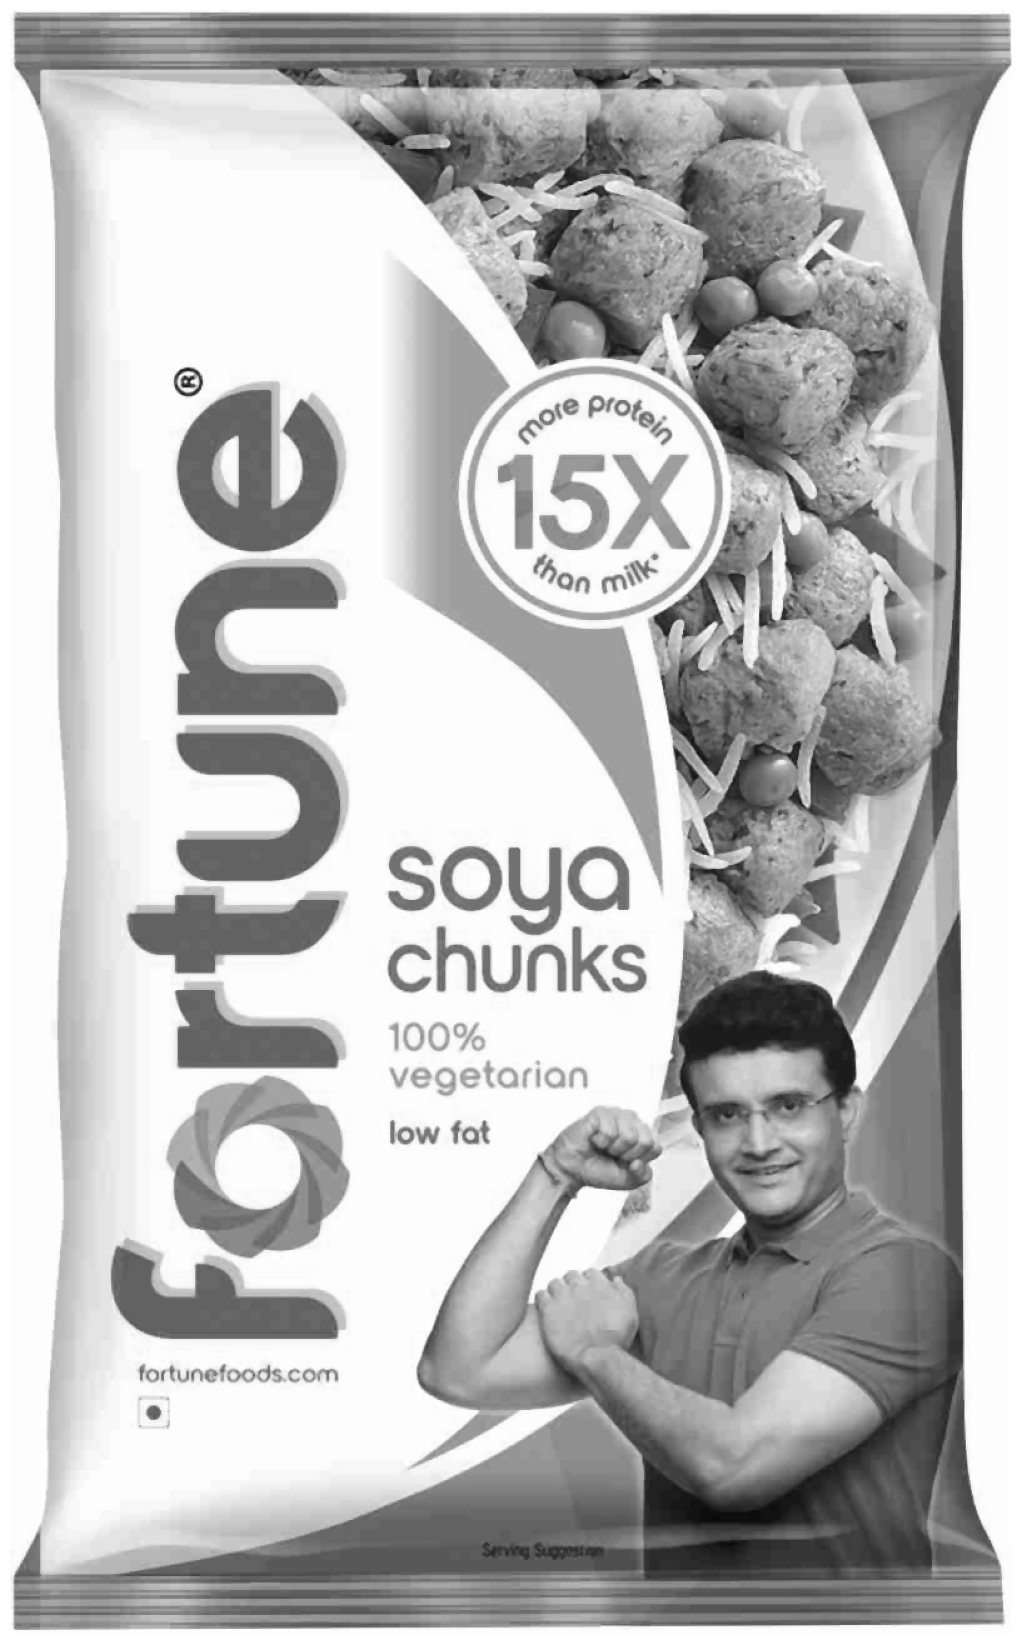

In [27]:
display("no_noise.jpg")

## Using chatgpt

In [34]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred=cv2.GaussianBlur(gray, (5, 5), 0)

In [36]:
thresh=cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [39]:
kernel=np.ones((3, 3), np.uint8)
morph=cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [52]:
cv2.imwrite("gray_image.jpg", gray)

True

In [53]:
cv2.imwrite("blurred_image.jpg", blurred)

True

In [54]:
cv2.imwrite("thresh_image.jpg", thresh)

True

In [55]:
cv2.imwrite("kernel_image.jpg", kernel)

True

In [56]:
cv2.imwrite("morph_image.jpg", morph)

True

In [48]:
# Perform OCR on the image
extracted_text = pytesseract.image_to_string(morph)

In [49]:
# Print the extracted text
print("Extracted Text from Image:")
print(extracted_text)

Extracted Text from Image:
vegetarian
low fat




In [60]:
inverted_image = cv2.bitwise_not(thresh)

In [61]:
# Perform OCR on the image
extracted_text = pytesseract.image_to_string(inverted_image)

In [62]:
# Print the extracted text
print("Extracted Text from Image:")
print(extracted_text)

Extracted Text from Image:
alt

ue fortunefcods.com

iy
L




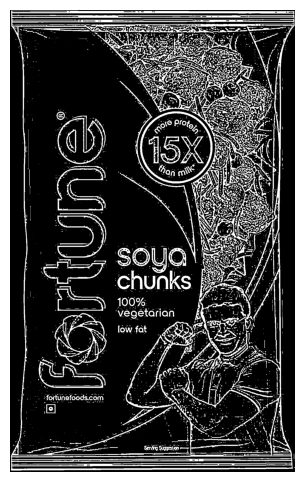

Extracted Text:



In [63]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('soya_f.jpg')

# Resize the image for better clarity (optional)
image = cv2.resize(image, (0, 0), fx=1.5, fy=1.5)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to enhance the text
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Use morphological transformations to improve text contours
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Display the preprocessed image
plt.figure(figsize=(10, 6))
plt.imshow(morph, cmap='gray')
plt.axis('off')
plt.show()

# Extract text using Tesseract OCR
# Make sure Tesseract is installed and properly configured
extracted_text = pytesseract.image_to_string(morph)

print("Extracted Text:")
print(extracted_text)


In [64]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)


In [65]:
edges = cv2.Canny(enhanced, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [67]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base")

# Process the image for Donut model and perform OCR
# Donut requires images to be resized and converted to specific input formats


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\wmd04\AppData\Roaming\Python\Python312\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.